#  <p style = "font-family:Fantasy" letter-spacing = 17rem><Font color = 'lightblue'> iris Dataset </Font></p>

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.multiclass import OneVsRestClassifier
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

### **1- Data Preprocessing:**


 Load the Iris dataset.


In [4]:
from sklearn import datasets #from sklearn import datasets
iris_data=datasets.load_iris()

In [5]:
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['iris type'] = iris_data.target

Perform data exploration.

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

 Check for missing values and handle them if any.

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris type            0
dtype: int64

data visualization

<Axes: >

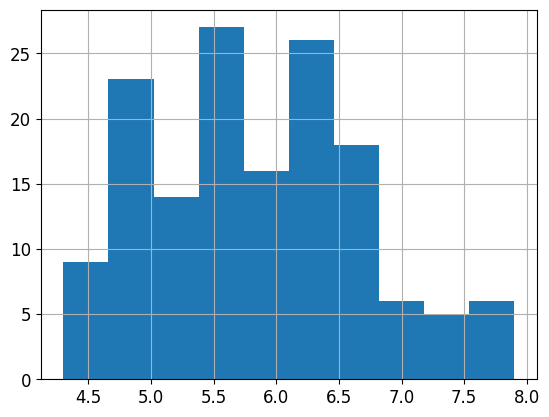

In [10]:
df['sepal length (cm)'].hist()

<Axes: >

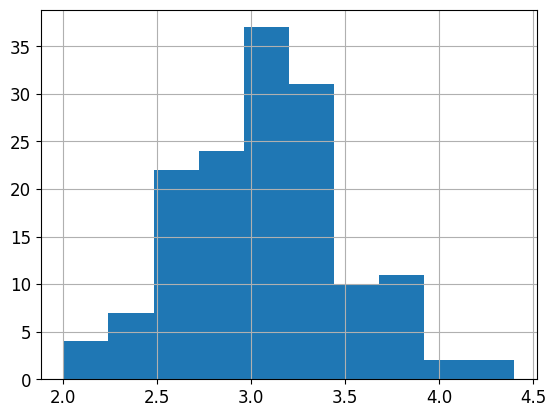

In [11]:
df['sepal width (cm)'].hist()

<Axes: >

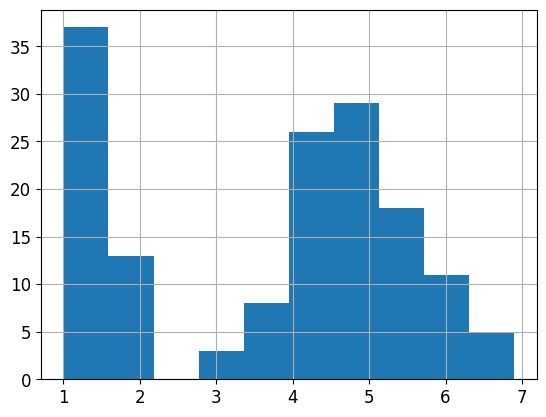

In [12]:
df['petal length (cm)'].hist()

<Axes: >

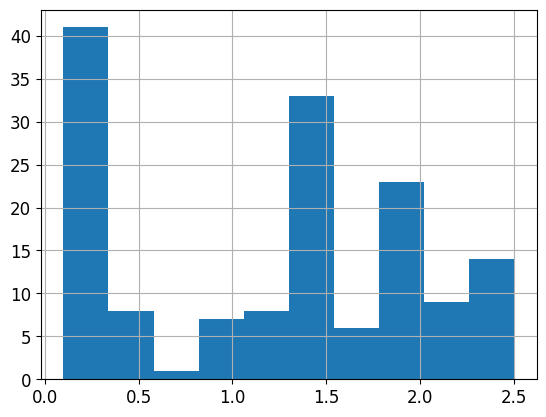

In [13]:
df[ 'petal width (cm)'].hist()

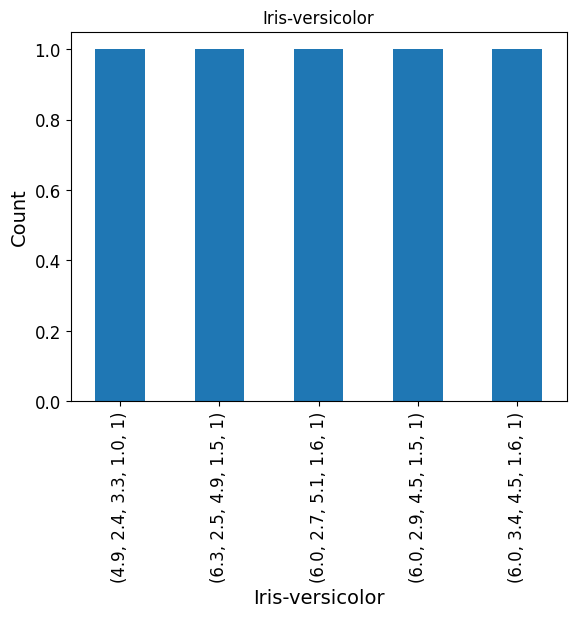

In [14]:
Iriss_virginica_counts = df[df['iris type']==1].value_counts()
Iriss_virginica_counts.iloc[:5].plot.bar()
plt.xlabel('Iris-versicolor')
plt.ylabel('Count')
plt.title('Iris-versicolor')
plt.show()

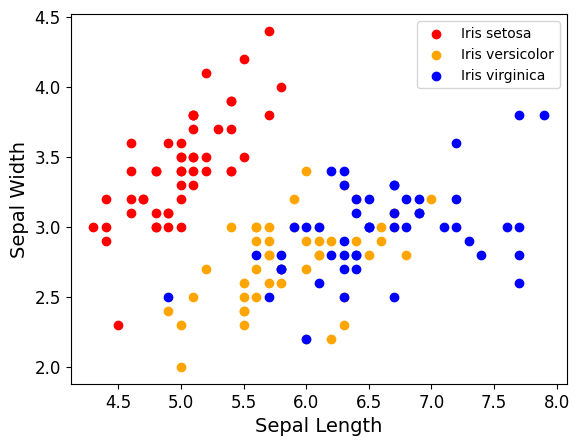

In [15]:
colors = ['red', 'orange', 'blue']
species_id = [0,1,2]
species = ["Iris setosa", "Iris versicolor", "Iris virginica"]
for i in range(3):
    x = df[df['iris type'] == species_id[i]]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

Split the dataset into features and target variables.

In [16]:
x = iris_data.data
y = iris_data.target

In [17]:
df['iris type'].value_counts()

iris type
0    50
1    50
2    50
Name: count, dtype: int64

Split the dataset into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### **2- Unsupervised Learning: Clustering and Outlier Detection:**


Apply K-means clustering algorithm to cluster the data.

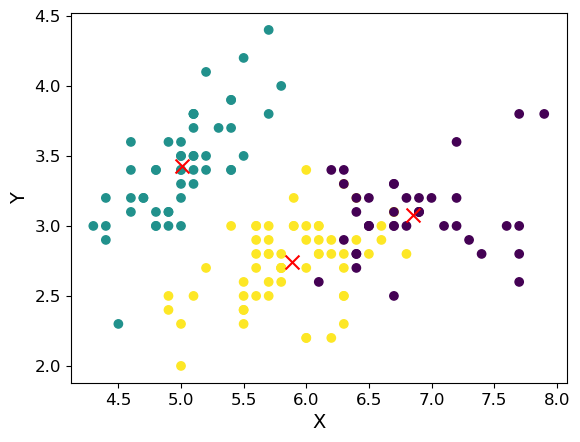

In [57]:
from sklearn.cluster import KMeans

# Create a KMeans object with the optimal number of clusters
#k = 5   Replace '5' with the desired number of clusters
km = KMeans(n_clusters=3, random_state=42)
km.fit(x)

# Get the cluster labels for each data point
labels = km.labels_

# Plot the data points with different colors for each cluster
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', color='red', s=100)

# Add labels to the x-axis and y-axis
plt.xlabel("X")
plt.ylabel("Y")

# Display the plot
plt.show()

Visualize the clusters

Detect outliers using appropriate techniques such as isolation forest or DBSCAN

In [51]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)
model = model.fit(x)

In [53]:
set(model.labels_)

{-1, 0, 1}

In [54]:
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)

print("Estimated number of noise points: %d" % n_noise_)

Estimated number of noise points: 120


Evaluate the clustering results

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

### **3- Supervised Learning: Baseline Model:**


Choose an appropriate evaluation metric based on the problem

 Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
# model training
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [62]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

 Evaluate the baseline model's performance

In [64]:
# Calculate accuracy 

print("Accuracy: ",model.score(x_test, y_test) * 100)
accuracy = accuracy_score(y_test, y_pred)
accuracy

Accuracy:  100.0


1.0

In [65]:
# Calculate accuracy 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(57.222222222222214, 0.5, 'Truth')

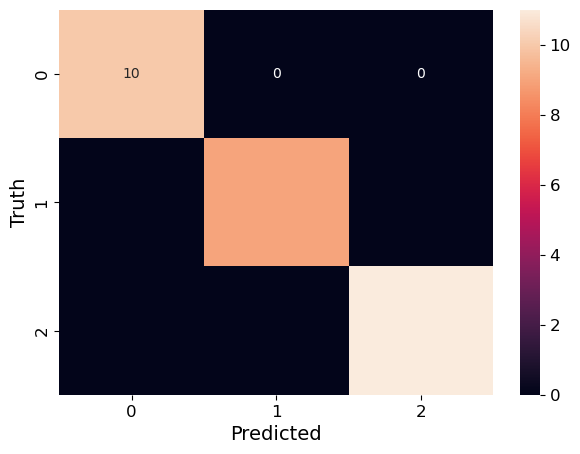

In [48]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### **4- Model Comparison:**


### **5- Model Tuning and Ensemble**


Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search

In [ ]:
# Select 3-4 machine learning algorithms
svm_model = SVC(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Implement each algorithm and evaluate its performance using cross-validation
models = [('Logistic Regression', baseline_model),
          ('SVM', svm_model),
          ('Random Forest', random_forest_model),
          ('Gradient Boosting', gradient_boosting_model)]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

# Select the best-performing algorithm
best_model = max(models, key=lambda x: x[1].score(X_test, y_test))[1]
print("Best Performing Model:", best_model.__class__.__name__)

In [ ]:
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the tuned model's performance
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", accuracy_tuned)
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

# Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model
ensemble_model = VotingClassifier(estimators=models)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("Ensemble Model Accuracy:", accuracy_ensemble)
print("Classification Report (Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble))

In [37]:
from sklearn.model_selection import cross_val_score
for reg_params in (0.1, 1 , 2, 7, 20, 30):
    print(reg_params)
    model = LogisticRegression(max_iter=200,C=reg_params)
    accuracies = cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
    print(np.mean(accuracies)*100)

0.1
93.33333333333333
1
96.66666666666666
2
95.83333333333334
7
94.16666666666667
20
94.16666666666667
30
95.0


 Evaluate the tuned model's performance

In [38]:
model = LogisticRegression(max_iter=200,C=1)
accuracies = cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
print(np.mean(accuracies)*100)

96.66666666666666


Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model